In [2]:
from dsl import *
import numpy as np

0: ─╭|Ψ⟩─┤  State
1: ─├|Ψ⟩─┤  State
2: ─├|Ψ⟩─┤  State
3: ─╰|Ψ⟩─┤  State


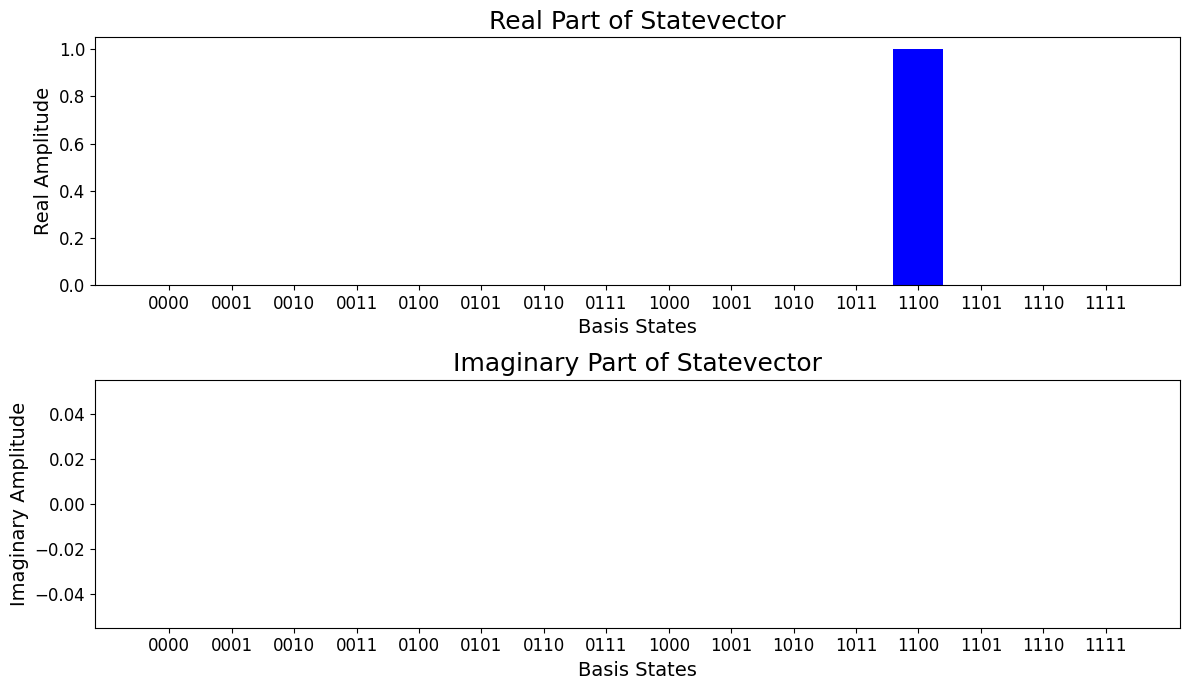

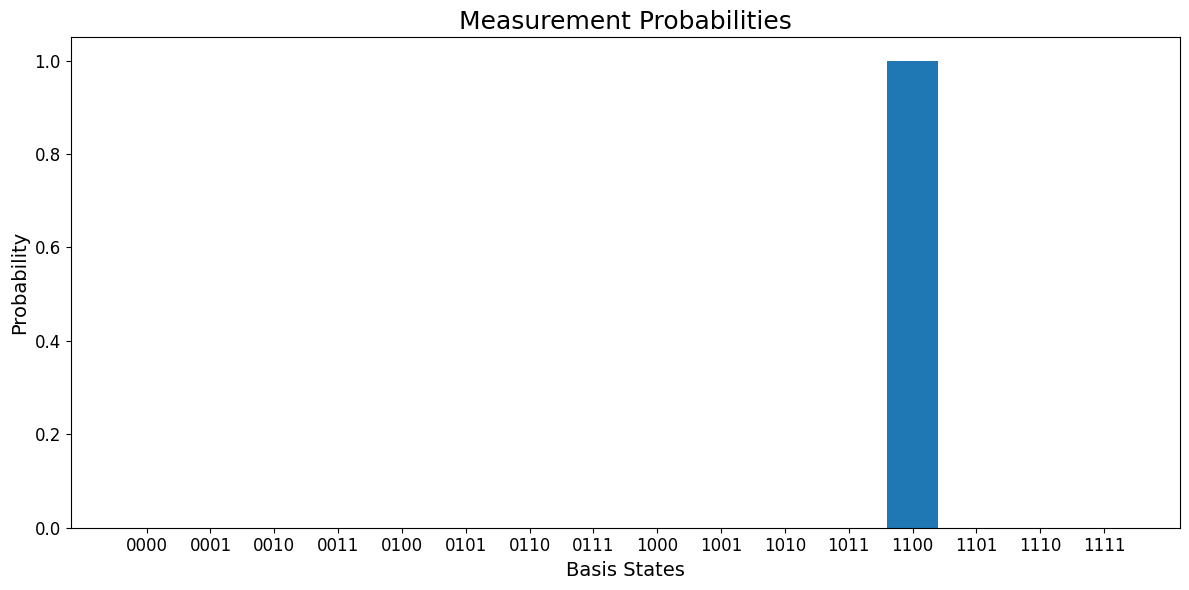

In [13]:
electrons = 2
orbitals = 4

with PREPARE(orbitals) as p:
    HARTREE_FOCK(electrons=electrons, orbitals=orbitals)
    MEASURE("state")

DRAW(p, "ascii")               
GRAPH(p, "statevector")        
GRAPH(p, "probs")              

0: ─╭|Ψ⟩──────────┤  State
1: ─├|Ψ⟩─╭G(0.79)─┤  State
2: ─├|Ψ⟩─╰G(0.79)─┤  State
3: ─╰|Ψ⟩──────────┤  State


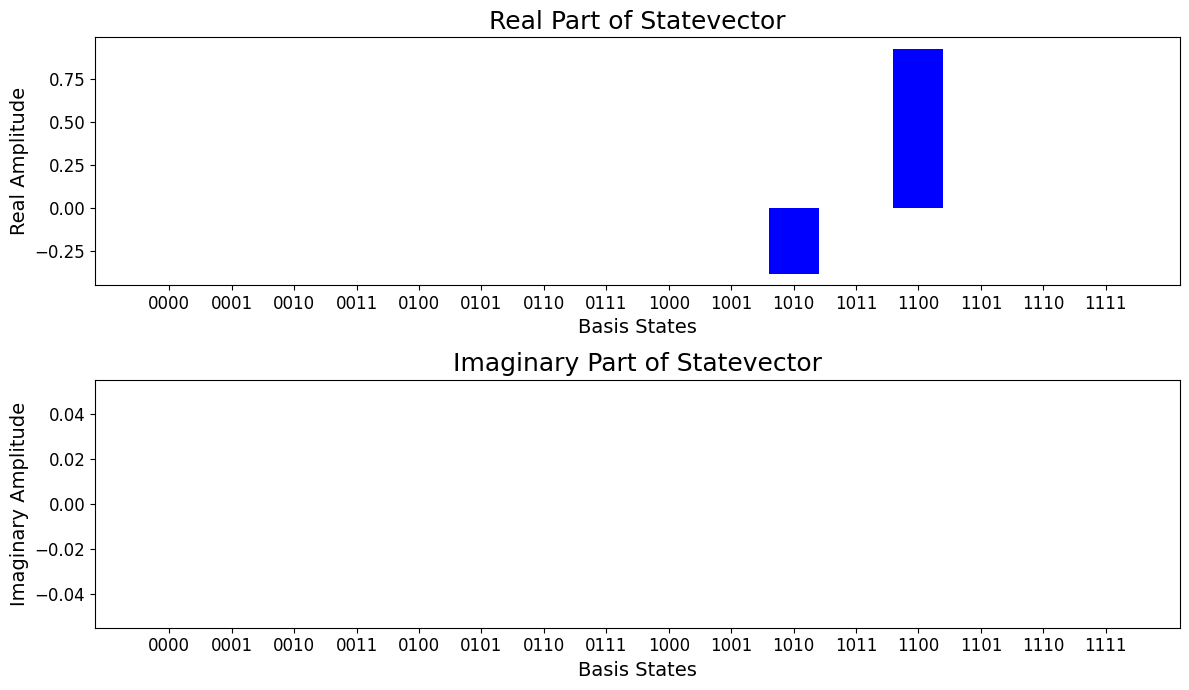

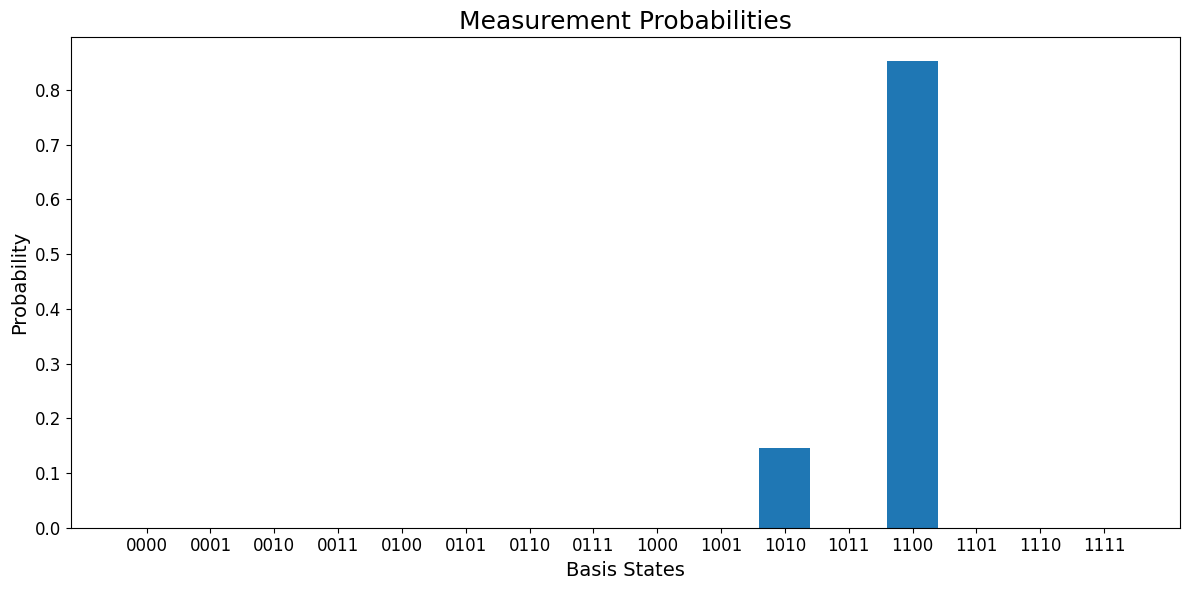

In [ ]:
theta = np.pi / 4  

with PREPARE(orbitals) as p:
    HARTREE_FOCK(electrons, orbitals)
    SINGLE_EXCITATION(theta, wires=(1, 2))
    MEASURE("state")

DRAW(p, "ascii")
GRAPH(p, "statevector")
GRAPH(p, "probs")


0: ─╭|Ψ⟩─╭G²(0.79)─┤  State
1: ─├|Ψ⟩─├G²(0.79)─┤  State
2: ─├|Ψ⟩─├G²(0.79)─┤  State
3: ─╰|Ψ⟩─╰G²(0.79)─┤  State


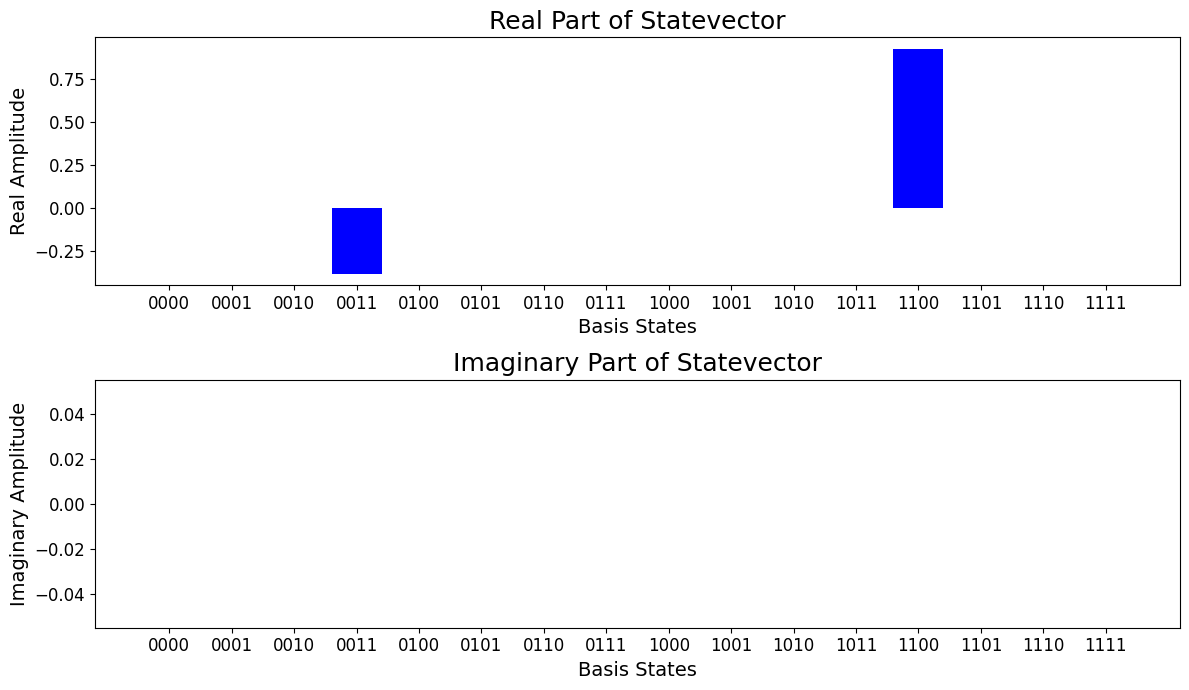

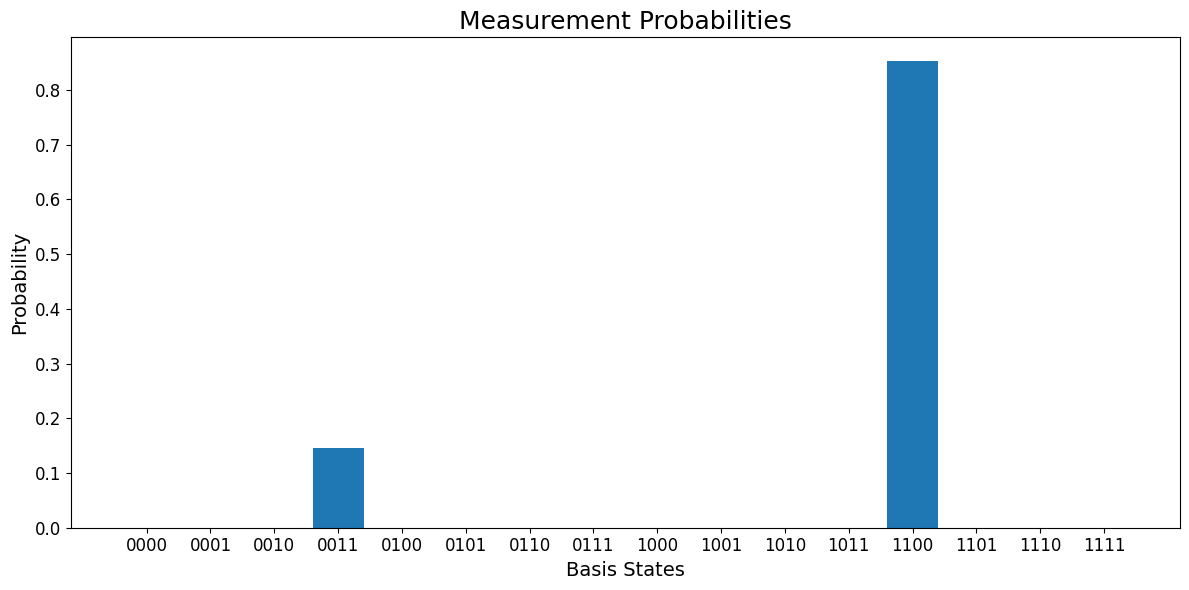

In [5]:
with PREPARE(orbitals) as p:
    # Hartree–Fock: |1100>
    HARTREE_FOCK(electrons, orbitals)

    # Double excitation (0,1) -> (2,3)
    # This is the classic H2 closed-shell double excitation.
    DOUBLE_EXCITATION(theta, wires=(0, 1, 2, 3))

    MEASURE("state")

DRAW(p, "ascii")
GRAPH(p, "statevector")
GRAPH(p, "probs")

In [11]:
from dsl import *
import numpy as np
import pennylane as qml
from pennylane import qchem

# --- 1. Build the molecular Hamiltonian (e.g. H2) ---
symbols = ["H", "H"]
geometry = np.array(
    [
        [-0.70108983, 0.0, 0.0],
        [ 0.70108983, 0.0, 0.0],
    ]
)

H, n_qubits = MOLECULAR_HAMILTONIAN(
    symbols=symbols,
    geometry=geometry,
    charge=0,
    mult=1,
    basis="sto-3g",
)

electrons = 2          # for H2
theta = np.pi / 4      # correlation parameter

# --- 2. Quantum program using that Hamiltonian ---
with PREPARE(n_qubits) as p:
    HARTREE_FOCK(electrons, orbitals=n_qubits)
    DOUBLE_EXCITATION(theta, wires=(0, 1, 2, 3))
    MEASURE("expval", hamiltonian=H)

# --- 3. Run the program to get the ground-state energy estimate ---
energy = p()
print("Estimated molecular energy ⟨H⟩(θ):", energy)


TypeError: prod() got multiple values for argument 'axis'